In [88]:
#!python -m spacy download fr_core_news_md -q

In [89]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [90]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [92]:
null_counts = df.isna().sum()
null_counts.sort_values(ascending=False)

Unnamed: 4    5566
Unnamed: 3    5560
Unnamed: 2    5522
v1               0
v2               0
dtype: int64

In [93]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [94]:
df["v1"].value_counts() #the classes are imbalanced

ham     4825
spam     747
Name: v1, dtype: int64

In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['v1_encoded'] = encoder.fit_transform(df['v1'])

In [96]:
df

,v1,v2,v1_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


CLEAN THE REVIEWS

In [97]:
# Import Spacy and french initialisation
import fr_core_news_md
nlp = fr_core_news_md.load()

# Import Stop words
from spacy.lang.fr.stop_words import STOP_WORDS

In [98]:
df["review_clean"] = df["v2"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'"))
df["review_clean"] = df["review_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
df["review_clean"] = df["review_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))

df

,v1,v2,v1_encoded,review_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy availabl only in b...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah don' t think he goe to usf he lives around...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,this is the 2nd time we haver tried 2 contact ...
5568,ham,Will Ì_ b going to esplanade fr home?,0,will ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,pity was in mood for that soany other sugges...
5570,ham,The guy did some bitching but I acted like i'd...,0,the guy did some bitching but acted like i' d ...


TOKENIZE THE REVIEWS

In [99]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [100]:
import tensorflow as tf
import numpy as np
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab") # instanciate the tokenizer
tokenizer.fit_on_texts(df.review_clean)
df["review_encoded"] = tokenizer.texts_to_sequences(df.review_clean)

In [101]:
df.head(3)

,v1,v2,v1_encoded,review_clean,review_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy availabl only in b...,"[42, 444, 1, 355, 691, 659, 66, 8, 1, 93, 116,..."
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,"[44, 310, 1, 432, 5, 1]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 wkly comp to win fa cup final ...,"[46, 458, 8, 20, 729, 876, 2, 176, 1, 1, 609, ..."


In [102]:
def count_words(text):
  words= word_tokenize(text)
  return len(words)

df["review_clean1"] = df['review_clean'].apply(count_words)
df.head(2)

,v1,v2,v1_encoded,review_clean,review_encoded,review_clean1
0,ham,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy availabl only in b...,"[42, 444, 1, 355, 691, 659, 66, 8, 1, 93, 116,...",19
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni,"[44, 310, 1, 432, 5, 1]",6


In [103]:
reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(df.review_encoded, padding = "post")

TRAIN AND TEST

In [104]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval = train_test_split(reviews_pad,df["v1_encoded"], test_size=0.3, stratify = df["v1_encoded"] )

In [105]:
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [106]:
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [107]:
# Regardons un batch
for review, v1 in train_batch.take(1):
  print(review, v1)

tf.Tensor(
[[  3 197 180 ...   0   0   0]
 [  1   1  93 ...   0   0   0]
 [ 45   7 722 ...   0   0   0]
 ...
 [379   1  39 ...   0   0   0]
 [691 986 340 ...   0   0   0]
 [  1 191   1 ...   0   0   0]], shape=(64, 164), dtype=int32) tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0], shape=(64,), dtype=int64)


MODELLING

In [108]:
vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding
                  tf.keras.layers.Embedding(vocab_size+1, 8, input_shape=[review.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Couche Dense classique
                  tf.keras.layers.Dense(16, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")])

In [109]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7c61583e4370>>

In [127]:
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)
    true_positives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(y_pred, 1)), tf.float32))
    predicted_positives = tf.reduce_sum(y_pred)
    actual_positives = tf.reduce_sum(y_true)
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())
    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1

optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', f1_score,
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC()])

In [128]:
history = model.fit(train_batch,
                    epochs=20,
                    validation_data=val_batch)

Epoch 1/20
61/61 [==============================] - 2s 11ms/step - loss: 0.0153 - accuracy: 0.9967 - f1_score: -0.3097 - precision_2: 0.9961 - recall_2: 0.9790 - auc_2: 0.9980 - val_loss: 0.1095 - val_accuracy: 0.9868 - val_f1_score: -0.2590 - val_precision_2: 0.9720 - val_recall_2: 0.9286 - val_auc_2: 0.9764
Epoch 2/20
61/61 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.9969 - f1_score: -0.1852 - precision_2: 0.9942 - recall_2: 0.9828 - auc_2: 0.9980 - val_loss: 0.1161 - val_accuracy: 0.9874 - val_f1_score: -0.2014 - val_precision_2: 0.9765 - val_recall_2: 0.9286 - val_auc_2: 0.9745
Epoch 3/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0144 - accuracy: 0.9974 - f1_score: -0.1217 - precision_2: 1.0000 - recall_2: 0.9809 - auc_2: 0.9980 - val_loss: 0.1090 - val_accuracy: 0.9874 - val_f1_score: -0.2442 - val_precision_2: 0.9765 - val_recall_2: 0.9286 - val_auc_2: 0.9766
Epoch 4/20
61/61 [==============================] - 0s 5ms/step - los

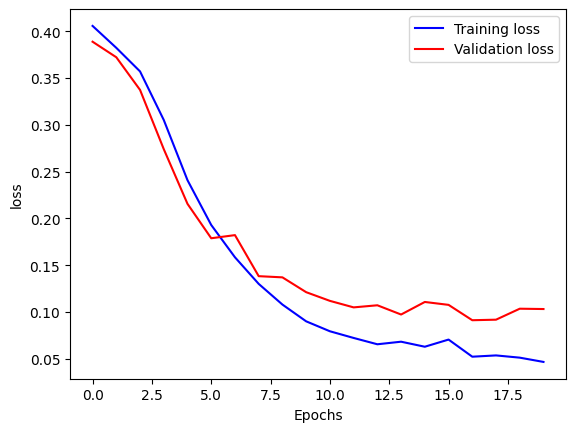

In [116]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function
plt.plot(history.history["loss"], color="b", label= "Training loss")
plt.plot(history.history["val_loss"], color="r", label = "Validation loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

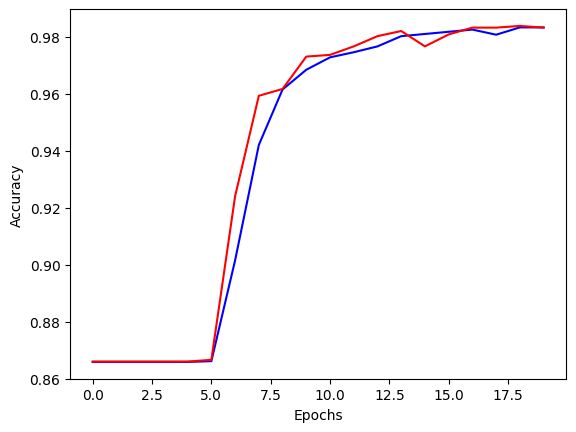

In [113]:
# Visualization of accuracy training
plt.plot(history.history["accuracy"], color="b", label = "Trainning Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

## The model is performing quite well.
After 5 epochs the model starts having:
-  Low values of the loss function which indicates that the model has good performance.
-  High accuracy of ~0.98-0.99 for both train and test
-  F1-scores are not very optimal, they are pretty low,  probably due to the class imbalance: there little proportion of spam examples in the dataset